In [1]:
# 회귀와 분류
# 회귀 : 연속된 값 중 하나
# 분류 : 0 또는 1 (여러 카테고리 중 하나)

In [2]:
# 지도와 비지도
# 지도 : 정답을 주고
# 비지도 : 정답 없이

In [3]:
# 확률적 경사하강법 Stochastic Gradient Descent : SGD

In [4]:
import pandas as pd

df = pd.read_csv("houseprice.csv")

In [5]:
df.head()

size  no_rooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

In [6]:
df.tail()

size  no_rooms   price
42  2567         4  314000
43  1200         3  299000
44   852         2  179900
45  1852         4  299900
46  1203         3  239500

<Axes: xlabel='size', ylabel='price'>

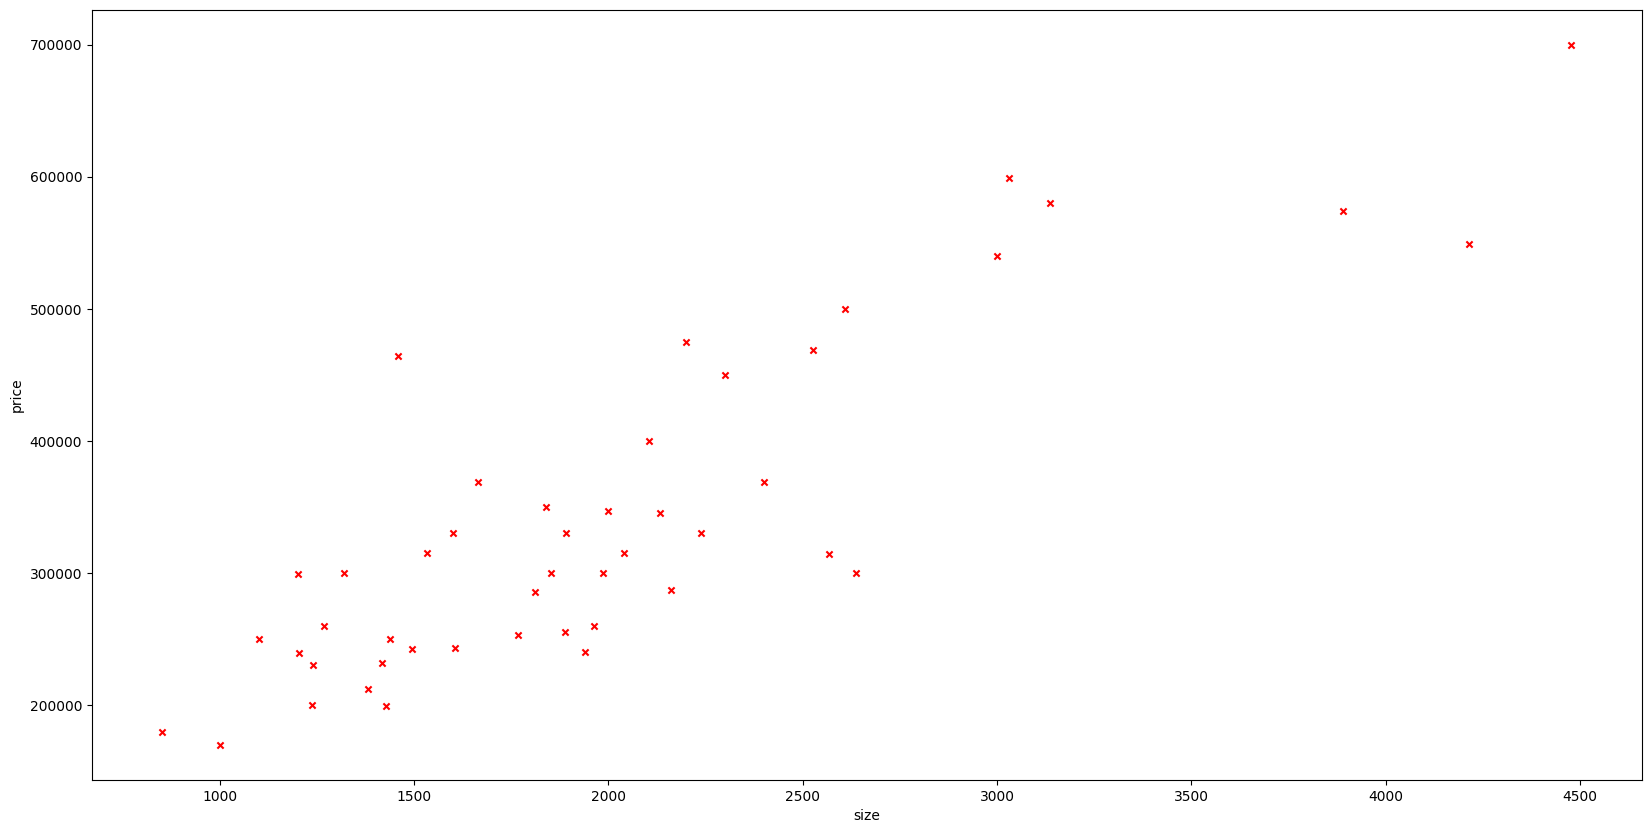

In [7]:
df.plot.scatter(x="size", y="price", c="red", marker="x", figsize=(20, 10))

In [8]:
# 독립변수x, 종속변수y

In [9]:
def 비용함수():
    y_hat = [100, 105, 110, 120, ...]  # 100개 예측치
    y_real = [102, 106, 123, 126, ...]  # 100개 실제값
    sum_ = 0
    n = 100
    for i in range(n):
        sum_ += ((y_hat - y_real) ** 2) / n
    return sum_

# 비용함수
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$


# 경사하강법

    \begin{align}
    \frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\end{align}
\begin{align}
\frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
    \end{align}

In [16]:
def 비용함수(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        y_hat = w * x[i] + b
        cost += (y_hat - y[i]) ** 2
    total_cost = (1 / 2 * m) * cost
    return total_cost

In [17]:
def 그래디언트(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_hat = w * x[i] + b
        dj_dw_i = (y_hat - y[i]) * x[i]
        dj_db_i = (y_hat - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [22]:
import copy

def 경사하강법(x, y, w_in, b_in, alpha, max_iter, 비용함수, 그래디언트):
    w = copy.deepcopy(w_in)
    J_history = []
    # w = w_in
    b = b_in

    for i in range(max_iter):
        dj_dw, dj_db = 그래디언트(x, y, w, b)
        b = b - dj_db * alpha
        w = w - dj_dw * alpha
    return w, b

In [26]:
import numpy as np

x_train = np.array([1, 2])
y_train = np.array([300, 500])

In [27]:
w_init = 0
b_init = 0
max_iter = 10000
alpha = 0.01

w_final, b_final = 경사하강법(x_train, y_train, w_init, b_init, alpha, max_iter, 비용함수, 그래디언트)

In [28]:
w_final

199.99285075131766

In [29]:
b_final

100.011567727362